In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from matplotlib import cm
import seaborn as sns
import scipy.constants as const

### Задача 3

Для стандартного набора данных для задачи регрессии (см. например load_diabetes из sklearn.datasets) продемонстрируйте, как веса обращаются в ноль по мере увеличения коэффициента $\mu$ $L_1$-регуляризации. Разрешается использовать библиотечную реализацию регрессии, как в примере ниже:

In [147]:
data, target = load_diabetes(return_X_y=True)
a = 1e-6
alpha_linspace = np.linspace(a, 1, 200)
coeff = []
for mu in alpha_linspace:
    model = linear_model.Lasso(alpha = mu).fit(data, target)
    coeff.append(model.coef_)

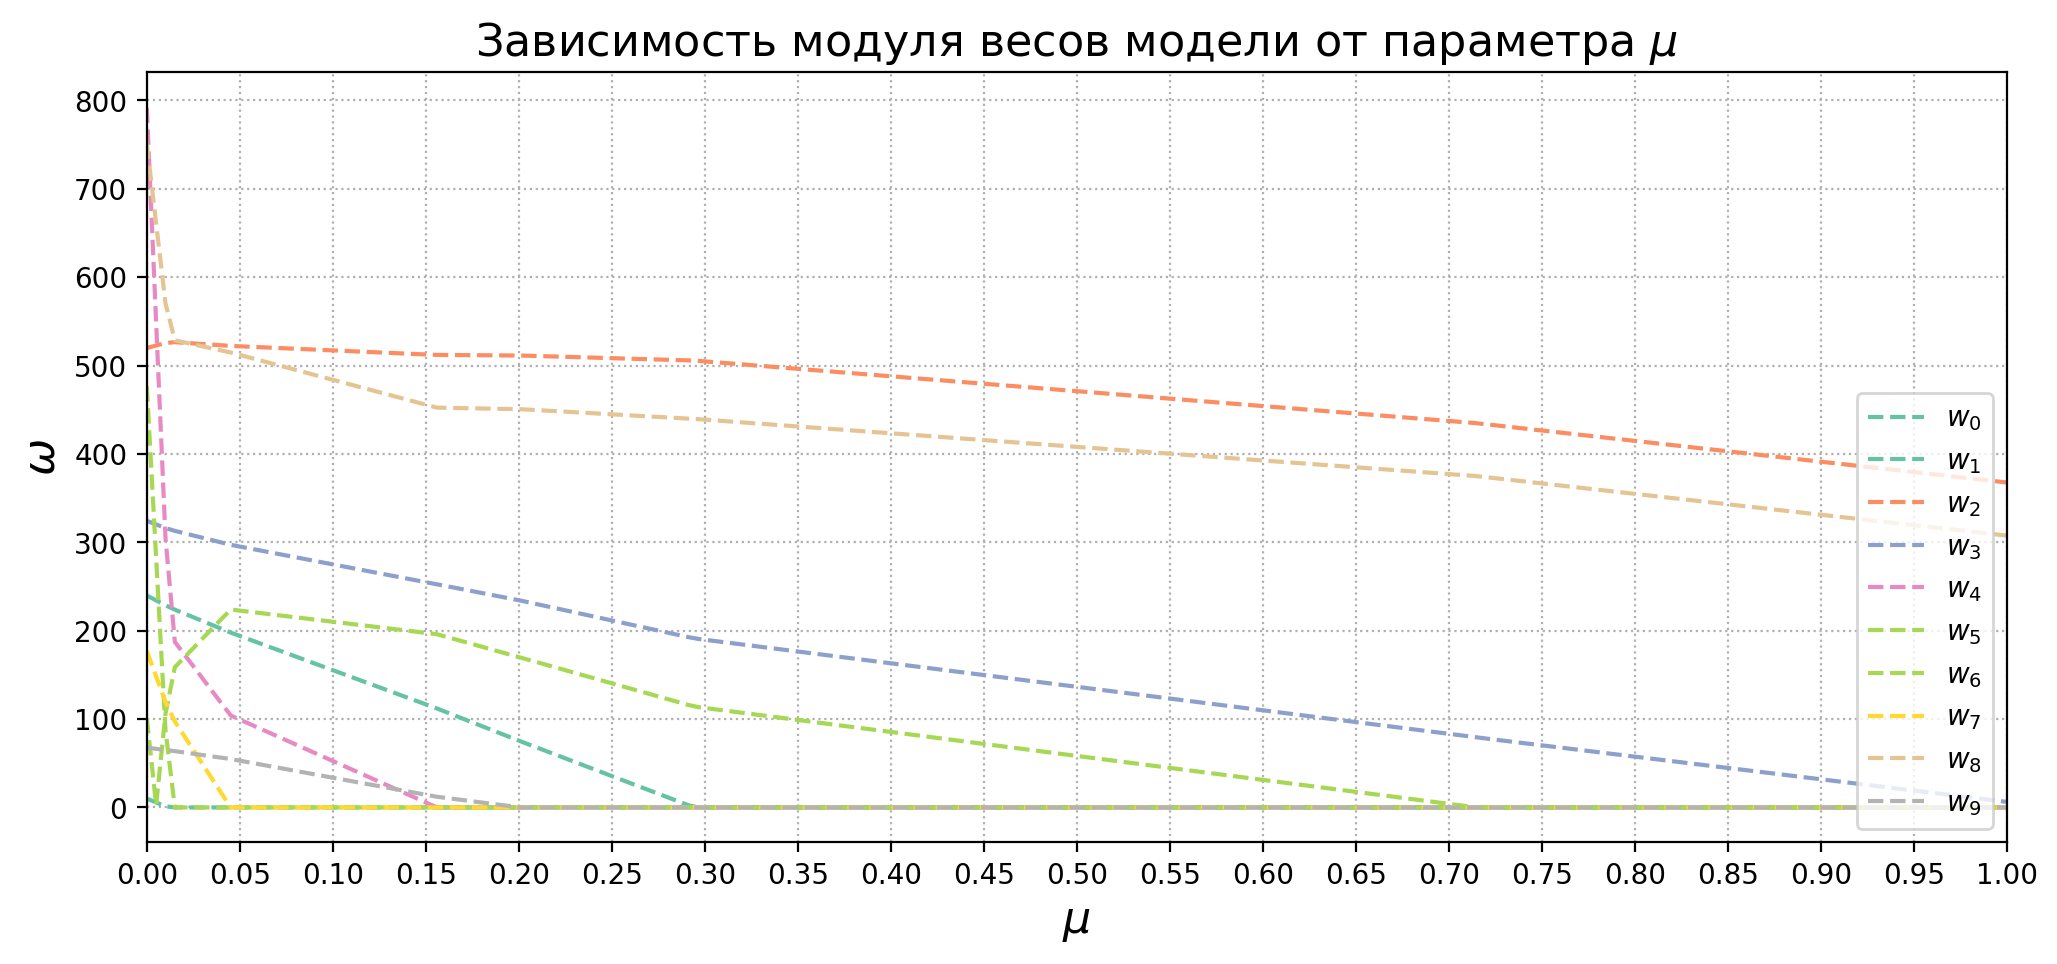

In [148]:
coeff = np.array(coeff)

plt.figure(figsize = (12, 5), dpi = 200)
for ind, c in enumerate(coeff.T):
    plt.plot(alpha_linspace, np.abs(c), label = f'$w_{ind}$', color = cm.Set2(ind / 10), linestyle = '--')

plt.legend(loc = 'lower right')
plt.grid(ls = ':')
plt.xticks(np.arange(0, 1.1, 0.05))
plt.xlim(0, 1)
plt.xlabel("$\mu$", fontsize = 16)
plt.ylabel("$\omega$", fontsize = 16)
plt.title("Зависимость модуля весов модели от параметра $\mu$", fontsize = 16);

### Задача 4

In [149]:
data = sns.load_dataset('mpg')
print(data.shape)
data.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [150]:
data['origin'], _ = pd.factorize(data['origin'])
data = data.dropna()
print(data.shape)
data.head()

(392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,0,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,0,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,0,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,0,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,0,ford torino


In [151]:
print(data.keys())

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


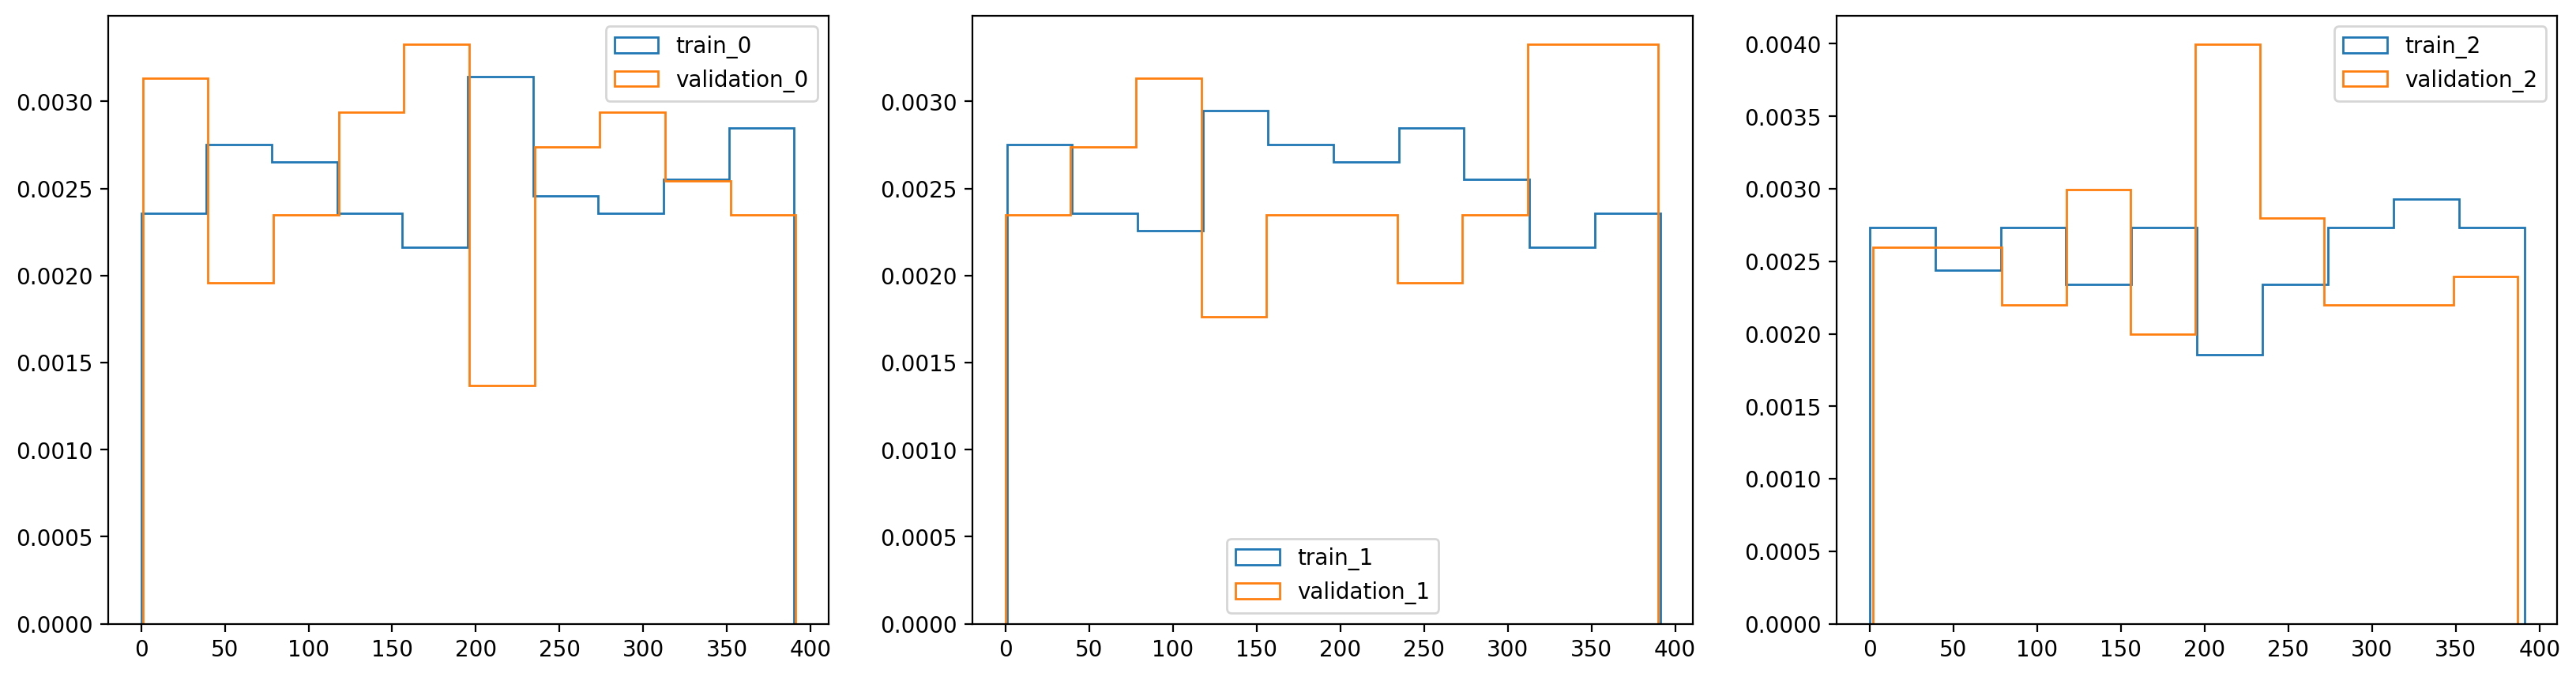

In [152]:
data = data.drop('name', axis = 1)
X, y = data.drop('mpg', axis = 1, inplace = False), data['mpg']
fold = KFold(n_splits = 3, shuffle = True)
train_validation = zip(fold.split(X), fold.split(y))

fig, ax = plt.subplots(1, 3, figsize = (20, 5), dpi = 200)

for ind, ((X_train, X_validation), (y_train, y_validation)) in enumerate(train_validation):
    plotable = ax[ind]
    plotable.hist(y_train, label = f'train_{ind}', histtype = 'step', density = True)
    plotable.hist(y_validation, label = f'validation_{ind}', histtype = 'step', density = True)
    plotable.legend()